<a href="https://colab.research.google.com/github/CarolPacifico0/Ptch2/blob/main/Project_COSMIC.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Data Processing

In [27]:

df = pd.read_csv("Gene_samplesMon Jan 27 13_30_16 2025.csv", sep="\t", header=0)

print("Colunas do DataFrame:", df.columns)


display(df.head())
print("Colunas do DataFrame:", df.columns)


Colunas do DataFrame: Index(['Gene Name,Transcript,Census Tier 1,Sample Name,Sample ID,AA Mutation,CDS Mutation,Primary Tissue,Tissue Subtype 1,Tissue Subtype 2,Histology,Histology Subtype 1,Histology Subtype 2,Pubmed Id,CGP Study,Somatic Status,Sample Type,Zygosity,Genomic Co-ordinates'], dtype='object')


,"Gene Name,Transcript,Census Tier 1,Sample Name,Sample ID,AA Mutation,CDS Mutation,Primary Tissue,Tissue Subtype 1,Tissue Subtype 2,Histology,Histology Subtype 1,Histology Subtype 2,Pubmed Id,CGP Study,Somatic Status,Sample Type,Zygosity,Genomic Co-ordinates"
0,"PTCH2_ENST00000447098,ENST00000447098.6,No,D11..."
1,"PTCH2_ENST00000447098,ENST00000447098.6,No,TCG..."
2,"PTCH2_ENST00000447098,ENST00000447098.6,No,TCG..."
3,"PTCH2_ENST00000447098,ENST00000447098.6,No,TCG..."
4,"PTCH2_ENST00000447098,ENST00000447098.6,No,TCG..."


Colunas do DataFrame: Index(['Gene Name,Transcript,Census Tier 1,Sample Name,Sample ID,AA Mutation,CDS Mutation,Primary Tissue,Tissue Subtype 1,Tissue Subtype 2,Histology,Histology Subtype 1,Histology Subtype 2,Pubmed Id,CGP Study,Somatic Status,Sample Type,Zygosity,Genomic Co-ordinates'], dtype='object')


## Data Cleaning

In [60]:
import pandas as pd

# Tentar ler o arquivo com o separador correto
df = pd.read_csv("Gene_samplesMon Jan 27 13_30_16 2025.csv", sep=",", header=0, encoding="utf-8")

# Exibir as primeiras linhas para confirmar que os dados foram lidos corretamente
display(df.head())

# Mostrar os nomes das colunas corretamente separadas
print("Columns of DataFrame:", df.columns)


,Gene Name,Transcript,Census Tier 1,Sample Name,Sample ID,AA Mutation,CDS Mutation,Primary Tissue,Tissue Subtype 1,Tissue Subtype 2,Histology,Histology Subtype 1,Histology Subtype 2,Pubmed Id,CGP Study,Somatic Status,Sample Type,Zygosity,Genomic Co-ordinates
0,PTCH2_ENST00000447098,ENST00000447098.6,No,D1119,2963692,p.L1106M,c.3316C>A,Central nervous system,Brain,NS,Primitive neuroectodermal tumour-medulloblastoma,NS,NS,25642631,-,Confirmed Somatic,Unknown,Unknown,1:44823110..44823110
1,PTCH2_ENST00000447098,ENST00000447098.6,No,TCGA-27-1836-01,1338061,p.V1062M,c.3184G>A,Central nervous system,Brain,NS,Glioma,Astrocytoma Grade IV,Glioblastoma multiforme,-,329,Confirmed Somatic,Tumour Sample,Unknown,1:44823316..44823316
2,PTCH2_ENST00000447098,ENST00000447098.6,No,TCGA-DB-A64L-01,2194258,p.G1029=,c.3087C>T,Central nervous system,Brain,NS,Glioma,NS,NS,-,545,Confirmed Somatic,Unknown,Unknown,1:44826277..44826277
3,PTCH2_ENST00000447098,ENST00000447098.6,No,TCGA-16-0848-01,2178151,p.A937=,c.2811C>T,Central nervous system,Brain,NS,Glioma,Astrocytoma Grade IV,Glioblastoma multiforme,-,329,Confirmed Somatic,Unknown,Unknown,1:44826653..44826653
4,PTCH2_ENST00000447098,ENST00000447098.6,No,TCGA-06-2566-01,2178226,p.D891=,c.2673C>T,Central nervous system,Brain,NS,Glioma,Astrocytoma Grade IV,Glioblastoma multiforme,-,329,Confirmed Somatic,Unknown,Unknown,1:44826924..44826924


Columns of DataFrame: Index(['Gene Name', 'Transcript', 'Census Tier 1', 'Sample Name', 'Sample ID',
       'AA Mutation', 'CDS Mutation', 'Primary Tissue', 'Tissue Subtype 1',
       'Tissue Subtype 2', 'Histology', 'Histology Subtype 1',
       'Histology Subtype 2', 'Pubmed Id', 'CGP Study', 'Somatic Status',
       'Sample Type', 'Zygosity', 'Genomic Co-ordinates'],
      dtype='object')


In [47]:
df.columns = df.columns.str.strip()
print(df.columns.tolist())

['Gene Name', 'Transcript', 'Census Tier 1', 'Sample Name', 'Sample ID', 'AA Mutation', 'CDS Mutation', 'Primary Tissue', 'Tissue Subtype 1', 'Tissue Subtype 2', 'Histology', 'Histology Subtype 1', 'Histology Subtype 2', 'Pubmed Id', 'CGP Study', 'Somatic Status', 'Sample Type', 'Zygosity', 'Genomic Co-ordinates']


In [48]:

total_samples = df["Sample ID"].nunique()

samples_with_mutations = df.dropna(subset=["CDS Mutation"])["Sample ID"].nunique()

total_mutations = df["CDS Mutation"].count()

summary_df = pd.DataFrame({
    "Total Samples in Dataset": [total_samples],
    "Samples with Mutations": [samples_with_mutations],
    "Total Mutations Recorded": [total_mutations]
})

from IPython.display import display
display(summary_df)

,Total Samples in Dataset,Samples with Mutations,Total Mutations Recorded
0,25,25,34


In [61]:
print("Columns before correction:", df.columns.tolist())

df.columns = df.columns.str.replace(r"[\n\r]", "", regex=True).str.strip()

print("Columns after correction:", df.columns.tolist())

print("Is 'Sample ID' on DataFrame now?", "Sample ID" in df.columns)


Columns before correction: ['Gene Name', 'Transcript', 'Census Tier 1', 'Sample Name', 'Sample ID', 'AA Mutation', 'CDS Mutation', 'Primary Tissue', 'Tissue Subtype 1', 'Tissue Subtype 2', 'Histology', 'Histology Subtype 1', 'Histology Subtype 2', 'Pubmed Id', 'CGP Study', 'Somatic Status', 'Sample Type', 'Zygosity', 'Genomic Co-ordinates']
Columns after correction: ['Gene Name', 'Transcript', 'Census Tier 1', 'Sample Name', 'Sample ID', 'AA Mutation', 'CDS Mutation', 'Primary Tissue', 'Tissue Subtype 1', 'Tissue Subtype 2', 'Histology', 'Histology Subtype 1', 'Histology Subtype 2', 'Pubmed Id', 'CGP Study', 'Somatic Status', 'Sample Type', 'Zygosity', 'Genomic Co-ordinates']
Is 'Sample ID' on DataFrame now? True


In [62]:
df.columns = df.columns.str.strip()

df.rename(columns=lambda x: x.strip(), inplace=True)

print("Columns corrected s:", df.columns.tolist())

mutations_per_sample = df.groupby("Sample ID")["CDS Mutation"].count().reset_index()

mutations_per_sample.columns = ["Sample ID", "Number of Mutations"]

from IPython.display import display
display(mutations_per_sample)


Columns corrected s: ['Gene Name', 'Transcript', 'Census Tier 1', 'Sample Name', 'Sample ID', 'AA Mutation', 'CDS Mutation', 'Primary Tissue', 'Tissue Subtype 1', 'Tissue Subtype 2', 'Histology', 'Histology Subtype 1', 'Histology Subtype 2', 'Pubmed Id', 'CGP Study', 'Somatic Status', 'Sample Type', 'Zygosity', 'Genomic Co-ordinates']


,Sample ID,Number of Mutations
0,753549,1
1,1312966,1
2,1312984,1
3,1337849,1
4,1338061,1
5,2107982,1
6,2178151,1
7,2178192,2
8,2178226,1
9,2194258,1


In [54]:
def classify_mutation(row):
    if "=" in row["AA Mutation"]:
        return "Silent"
    elif "*" in row["AA Mutation"]:
        return "Nonsense"
    elif "fs" in row["AA Mutation"]:
        return "Frameshift"
    elif "del" in row["CDS Mutation"] or "ins" in row["CDS Mutation"]:
        return "Indel"
    elif "p." in row["AA Mutation"]:
        return "Missense"
    else:
        return "Other"


df["Mutation Type"] = df.apply(classify_mutation, axis=1)

display(df)

,Gene Name,Transcript,Census Tier 1,Sample Name,Sample ID,AA Mutation,CDS Mutation,Primary Tissue,Tissue Subtype 1,Tissue Subtype 2,Histology,Histology Subtype 1,Histology Subtype 2,Pubmed Id,CGP Study,Somatic Status,Sample Type,Zygosity,Genomic Co-ordinates,Mutation Type
0,PTCH2_ENST00000447098,ENST00000447098.6,No,D1119,2963692,p.L1106M,c.3316C>A,Central nervous system,Brain,NS,Primitive neuroectodermal tumour-medulloblastoma,NS,NS,25642631,-,Confirmed Somatic,Unknown,Unknown,1:44823110..44823110,Missense
1,PTCH2_ENST00000447098,ENST00000447098.6,No,TCGA-27-1836-01,1338061,p.V1062M,c.3184G>A,Central nervous system,Brain,NS,Glioma,Astrocytoma Grade IV,Glioblastoma multiforme,-,329,Confirmed Somatic,Tumour Sample,Unknown,1:44823316..44823316,Missense
2,PTCH2_ENST00000447098,ENST00000447098.6,No,TCGA-DB-A64L-01,2194258,p.G1029=,c.3087C>T,Central nervous system,Brain,NS,Glioma,NS,NS,-,545,Confirmed Somatic,Unknown,Unknown,1:44826277..44826277,Silent
3,PTCH2_ENST00000447098,ENST00000447098.6,No,TCGA-16-0848-01,2178151,p.A937=,c.2811C>T,Central nervous system,Brain,NS,Glioma,Astrocytoma Grade IV,Glioblastoma multiforme,-,329,Confirmed Somatic,Unknown,Unknown,1:44826653..44826653,Silent
4,PTCH2_ENST00000447098,ENST00000447098.6,No,TCGA-06-2566-01,2178226,p.D891=,c.2673C>T,Central nervous system,Brain,NS,Glioma,Astrocytoma Grade IV,Glioblastoma multiforme,-,329,Confirmed Somatic,Unknown,Unknown,1:44826924..44826924,Silent
5,PTCH2_ENST00000447098,ENST00000447098.6,No,TCGA-19-5956-01,2178192,p.A818V,c.2453C>T,Central nervous system,Brain,NS,Glioma,Astrocytoma Grade IV,Glioblastoma multiforme,-,329,Confirmed Somatic,Unknown,Unknown,1:44827228..44827228,Missense
6,PTCH2_ENST00000447098,ENST00000447098.6,No,D132,2963689,p.R811C,c.2431C>T,Central nervous system,Brain,NS,Glioma,Astrocytoma Grade III,Pleomorphic xanthoastrocytoma,25642631,-,Confirmed Somatic,Unknown,Unknown,1:44827250..44827250,Missense
7,PTCH2_ENST00000447098,ENST00000447098.6,No,D132,2963689,p.D797G,c.2390A>G,Central nervous system,Brain,NS,Glioma,Astrocytoma Grade III,Pleomorphic xanthoastrocytoma,25642631,-,Confirmed Somatic,Unknown,Unknown,1:44827291..44827291,Missense
8,PTCH2_ENST00000447098,ENST00000447098.6,No,Br27P,1312984,p.A677V,c.2030C>T,Central nervous system,Brain,NS,Glioma,Astrocytoma Grade IV,Glioblastoma multiforme,18772396,-,Confirmed Somatic,Tumour Sample,Heterozygous,1:44827871..44827871,Missense
9,PTCH2_ENST00000447098,ENST00000447098.6,No,3724T,2733673,p.A672T,c.2014G>A,Central nervous system,Brain,NS,Glioma,Astrocytoma Grade IV,Glioblastoma multiforme,27571888,-,Confirmed Somatic,Tumour Sample,Unknown,1:44827887..44827887,Missense


In [57]:
print(df["Mutation Type"].value_counts())


Mutation Type
Missense    22
Silent      12
Name: count, dtype: int64


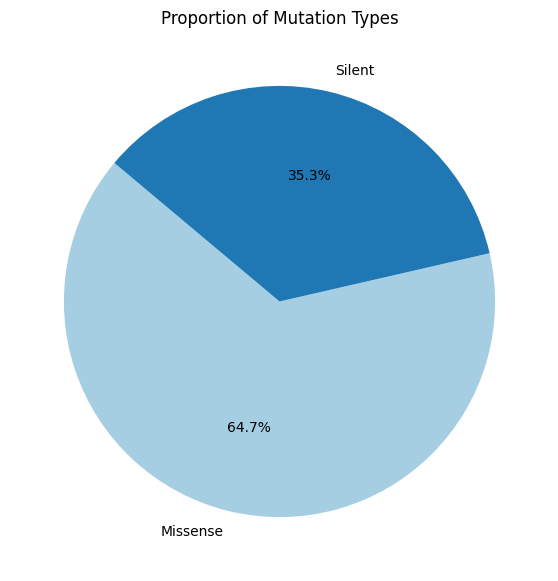

<ipython-input-58-6d13db5174c5>:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=mutations_per_sample.index.astype(str), y=mutations_per_sample.values, palette="coolwarm")


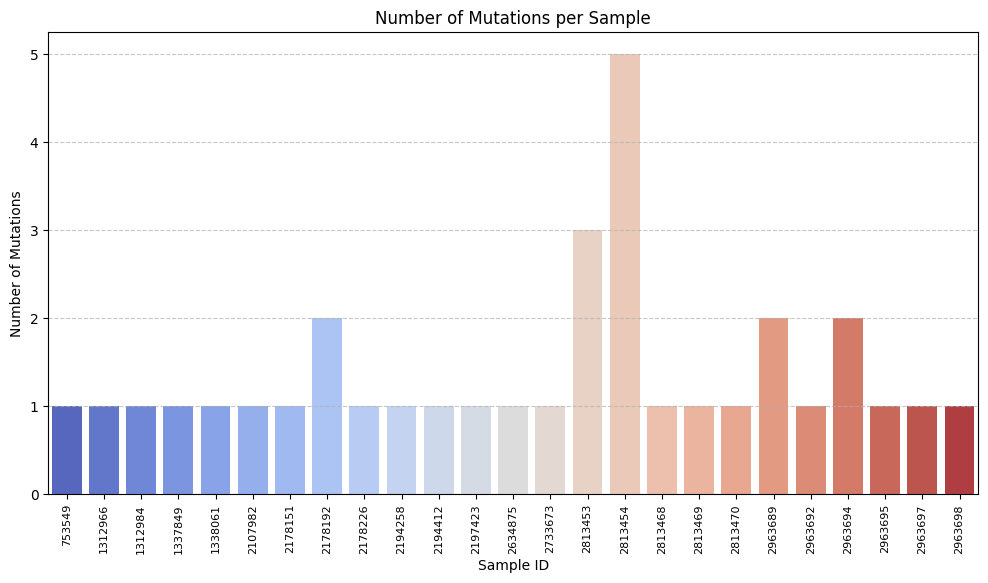

In [58]:
import matplotlib.pyplot as plt
import seaborn as sns

mutation_counts = df["Mutation Type"].value_counts()


plt.figure(figsize=(7, 7))
plt.pie(mutation_counts, labels=mutation_counts.index, autopct='%1.1f%%', colors=plt.cm.Paired.colors, startangle=140)
plt.title("Proportion of Mutation Types")
plt.show()

mutations_per_sample = df.groupby("Sample ID")["Mutation Type"].count()

plt.figure(figsize=(12, 6))
sns.barplot(x=mutations_per_sample.index.astype(str), y=mutations_per_sample.values, palette="coolwarm")
plt.xlabel("Sample ID")
plt.ylabel("Number of Mutations")
plt.title("Number of Mutations per Sample")
plt.xticks(rotation=90, fontsize=8)
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.show()
